<a href="https://colab.research.google.com/github/KhresnaPanduI/full-adder/blob/main/ASL_alphabet_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/Kaggle
%pwd

/content/drive/MyDrive/Kaggle


'/content/drive/MyDrive/Kaggle'

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:27<00:00, 37.1MB/s]
100% 1.03G/1.03G [00:27<00:00, 39.9MB/s]


In [ ]:
!ls
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
train_dir = '/content/drive/MyDrive/Kaggle/asl_alphabet_train/asl_alphabet_train'

In [ ]:
categories = os.listdir(train_dir)

In [ ]:
len(categories)

29

In [ ]:
# length of training images
length = 0
train_images_names_and_paths = {}

for cat in categories:
    train_images_names_and_paths[cat] = os.listdir(train_dir + '/' + cat)
    length += len(os.listdir(train_dir + '/' + cat))

print('Total Length of Training Images:', length)

Total Length of Training Images: 87000


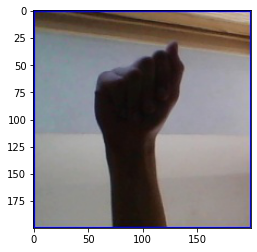

In [ ]:
img = plt.imread(train_dir + '/' + list(train_images_names_and_paths.keys())[0] + '/' + list(train_images_names_and_paths.values())[0][0])
plt.imshow(img)

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
dim1 = []
dim2 = []

for cat, name_list in train_images_names_and_paths.items():
    for name in name_list:
        dim1.append(plt.imread(train_dir + '/' + cat + '/' + name).shape[0])
        dim2.append(plt.imread(train_dir + '/' + cat + '/' + name).shape[1])
    break

In [ ]:
target_shape = (np.mean(dim1, dtype=np.int32), np.mean(dim2, dtype=np.int32))

In [ ]:
target_shape

(200, 200)

In [ ]:
test_inputs = os.listdir('/content/drive/MyDrive/Kaggle/asl_alphabet_test/asl_alphabet_test')

In [ ]:
len(test_inputs)

28

In [ ]:
image_gen = ImageDataGenerator(
                              rescale=1/255)

In [ ]:
train_gen = image_gen.flow_from_directory(train_dir,
                                         target_size=(200,200),
                                         class_mode="categorical",
                                         color_mode="rgb",
                                         shuffle=True,
                                         batch_size=32)

Found 87000 images belonging to 29 classes.


In [ ]:
# test_gen = image_gen.flow_from_directory(train_dir,
#                                          target_size=(200,200),
#                                          class_mode="categorical",
#                                          color_mode="rgb",
#                                          subset='validation',
#                                          shuffle=True,
#                                         batch_size=32,)

In [ ]:
train_gen.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [ ]:
len(train_gen.class_indices)

29

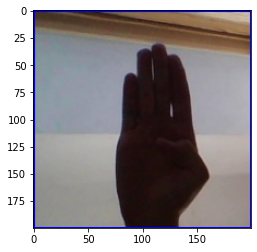

In [ ]:
img = plt.imread(train_dir + '/' + list(train_images_names_and_paths.keys())[1] + '/' + list(train_images_names_and_paths.values())[1][0])
plt.imshow(img)

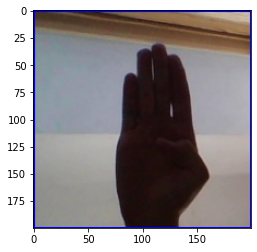

In [ ]:
trans_img = image_gen.random_transform(img)
plt.imshow(trans_img)

In [ ]:
input_shape = (200, 200, 3)

In [ ]:

model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(29, activation='softmax')
  ])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [ ]:
from keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='loss', patience=2)

In [ ]:
# train the model
model.fit(train_gen, epochs=10, callbacks=[early_stop])

Epoch 1/10
2719/2719 [==============================] - 348s 117ms/step - loss: 1.9852 - accuracy: 0.3955
Epoch 2/10
2719/2719 [==============================] - 316s 116ms/step - loss: 0.1723 - accuracy: 0.9513
Epoch 3/10
2719/2719 [==============================] - 312s 115ms/step - loss: 0.1602 - accuracy: 0.9647
Epoch 4/10
2719/2719 [==============================] - 313s 115ms/step - loss: 0.1828 - accuracy: 0.9675


In [ ]:
model.save('/kaggle/working/sign-language-model-new-iteration.h5')

In [ ]:
model.history.history

{'accuracy': [0.6798850297927856,
  0.9562643766403198,
  0.9649425148963928,
  0.9666091799736023],
 'loss': [1.01841139793396,
  0.16266196966171265,
  0.16640660166740417,
  0.1945776492357254]}